In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore') # Hides warning
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid") # Plotting style
# %matplotlib inline # Plots show up in notebook
np.random.seed(7) # seeding random number generator

In [ ]:
df=pd.read_csv("/content/1429_1.csv")
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [ ]:
data = df.copy()
data.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


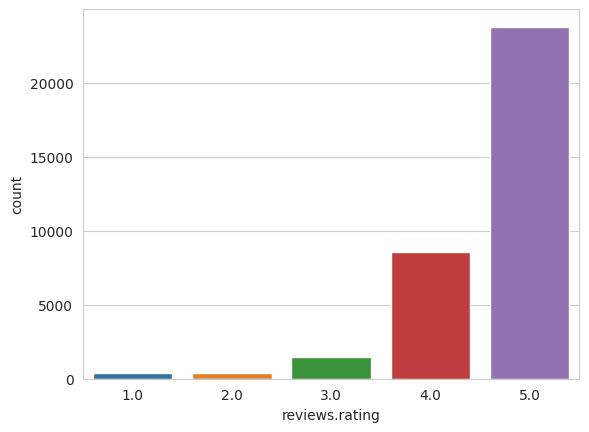

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names in the DataFrame
print(df.columns)

# Replace 'rating' with the correct column name if needed
sns.countplot(x='reviews.rating', data=df)

# Show the plot
plt.show()


In [ ]:
df['reviews.rating'].value_counts()

5.0    23775
4.0     8541
3.0     1499
1.0      410
2.0      402
Name: reviews.rating, dtype: int64

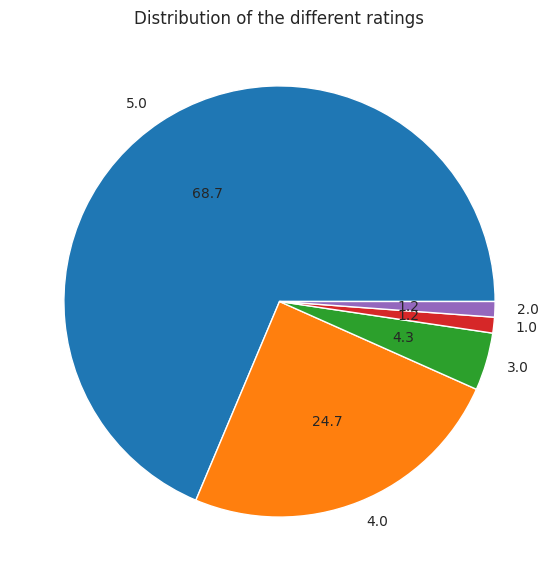

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = df['reviews.rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

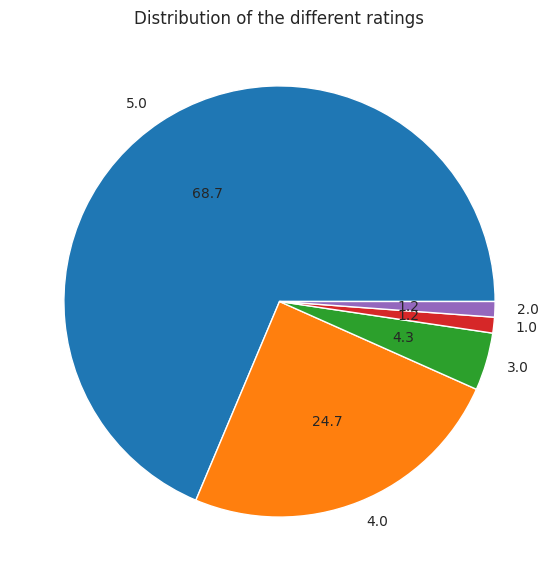

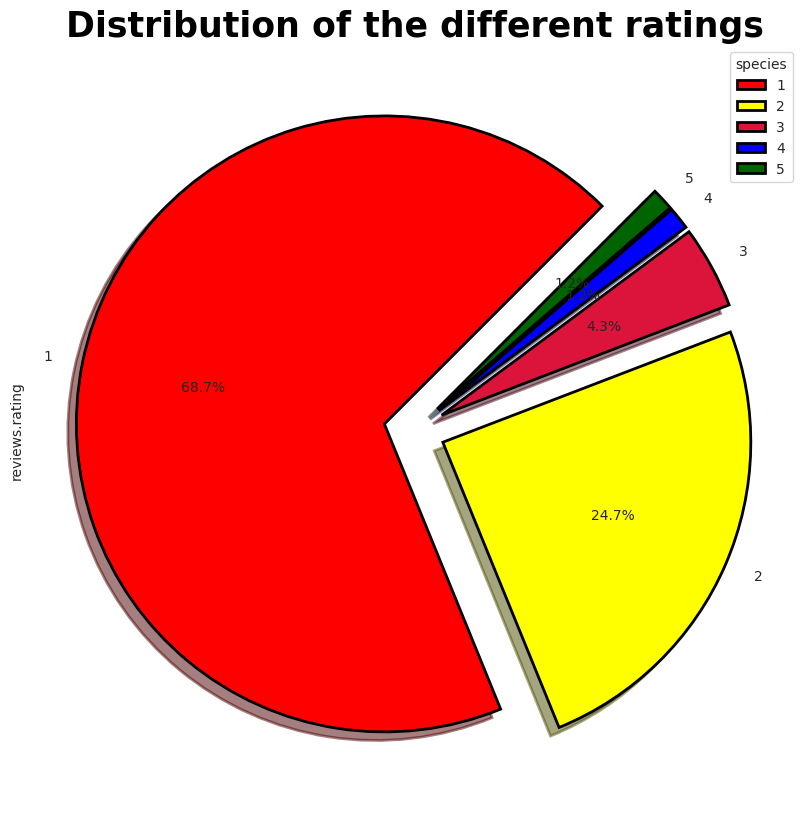

In [ ]:
fig = plt.figure(figsize=(7,7))
tags = df['reviews.rating'].value_counts()
tags.plot(kind='pie', autopct='%1.1f', label='')
plt.title('Distribution of the different ratings')
plt.show()

fig = plt.figure(figsize=(10,10))
colors = ("red", "yellow", "crimson", "blue", "darkgreen")
wp = {'linewidth':2, 'edgecolor':"black"}
data = df['reviews.rating'].value_counts()
explode = (0.1,0.1,0.1, 0.1,0.1)
classes = ['1','2','3','4','5']
data.plot(kind='pie', autopct='%0.1f%%',labels=classes, startangle = 45, colors = colors,
         explode = explode, shadow=True, wedgeprops = wp)
plt.legend(title="species")
plt.title("Distribution of the different ratings", loc='center', color='black', fontsize='25', fontweight='bold')
plt.show()

In [ ]:
# fig = plt.figure(figsize=(20,10))
# sns.countplot(y='reviews.username', data=df)

<Axes: xlabel='count', ylabel='categories'>

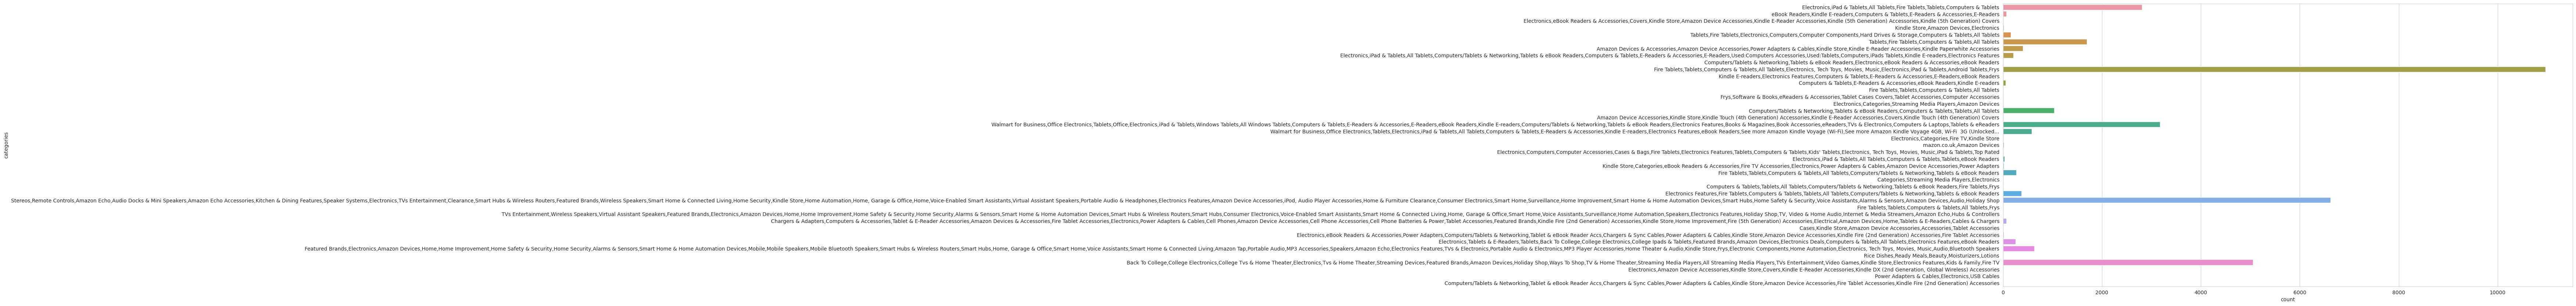

In [ ]:

# fig = plt.figure(figsize=(20,10))
# sns.countplot(y='categories', data=df)

In [ ]:
df['categories'].value_counts()

Fire Tablets,Tablets,Computers & Tablets,All Tablets,Electronics, Tech Toys, Movies, Music,Electronics,iPad & Tablets,Android Tablets,Frys                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               10966
Stereos,Remote Controls,Amazon Echo,Audio Docks & Mini Speakers,Amazon Echo Accessories,Kitchen & Dining Features,Speaker Systems,Electronics,TVs Entertainment,Clearance,Smart Hubs & Wireless Routers,Featured Brands,Wireless Speakers,Smart Home & Connected Living,H

In [ ]:
for i in range(5):
    print(df['reviews.text'].iloc[i], "\n")
    print(df['name'].iloc[i], "new","\n")

This product so far has not disappointed. My children love to use it and I like the ability to monitor control what content they see with ease. 

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta new 

great for beginner or experienced person. Bought as a gift and she loves it 

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta new 

Inexpensive tablet for him to use and learn on, step up from the NABI. He was thrilled with it, learn how to Skype on it already... 

All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta new 

I've had my Fire HD 8 two weeks now and I love it. This tablet is a great value.We are Prime Members and that is where this tablet SHINES. I love being able to easily access all of the Prime content as well as movies you can download and watch laterThis has a 1280/800 screen which has some really nice look to it its nice and crisp and very bright infact it i

In [ ]:
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

In [ ]:
!pip install keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
df.dropna(subset=['reviews.text'], inplace=True)

In [ ]:
tokenizer = Tokenizer(num_words=500, split=' ')
tokenizer.fit_on_texts(df['reviews.text'])
X = tokenizer.texts_to_sequences(df['reviews.text'])
X = pad_sequences(X)
X

array([[  0,   0,   0, ..., 266,  13, 435],
       [  0,   0,   0, ...,  38,  66,   5],
       [  0,   0,   0, ...,  15,   5, 312],
       ...,
       [  0,   0,   0, ...,  51,  55, 367],
       [  0,   0,   0, ...,  85,  65,  28],
       [  0,   0,   0, ...,   3,  78,  34]], dtype=int32)

In [ ]:
def data_processing(text):
    return text if pd.notnull(text) else ''

# Apply the data_processing function to the 'reviews.text' column
df['reviews.text'] = df['reviews.text'].apply(data_processing)

In [ ]:
X.shape

(34659, 1317)

In [ ]:
# Handle missing values (replace NaN with an empty string)
df['reviews.text'].fillna('', inplace=True)

# Get the count of reviews for each rating class
rating_counts = df['reviews.rating'].value_counts()

# Identify the rating classes with fewer samples (in this case, all classes from 1 to 5)
rating_classes_to_resample = [1, 2, 3, 4, 5]

# Calculate the desired number of reviews for each class as the maximum count after resampling
desired_rating_counts = rating_counts.max()

# Create an empty list to store the oversampled data
oversampled_data = []

# Loop through the DataFrame and oversample the reviews for each rating class
for rating_class in rating_classes_to_resample:
    # Get the reviews belonging to the current rating class
    reviews = df[df['reviews.rating'] == rating_class]

    # Limit the number of oversampled reviews to match the desired count
    num_oversamples = desired_rating_counts - len(reviews)

    # Repeat the reviews based on the oversampling factor and desired count
    if num_oversamples > 0:
        oversampled_reviews = reviews.sample(n=num_oversamples, replace=True)
        oversampled_data.extend(oversampled_reviews.values)

# Create a new DataFrame with the original and oversampled data
df_oversampled = pd.DataFrame(oversampled_data, columns=df.columns)

Index(['id', 'name', 'asins', 'brand', 'categories', 'keys', 'manufacturer',
       'reviews.date', 'reviews.dateAdded', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.userCity',
       'reviews.userProvince', 'reviews.username'],
      dtype='object')


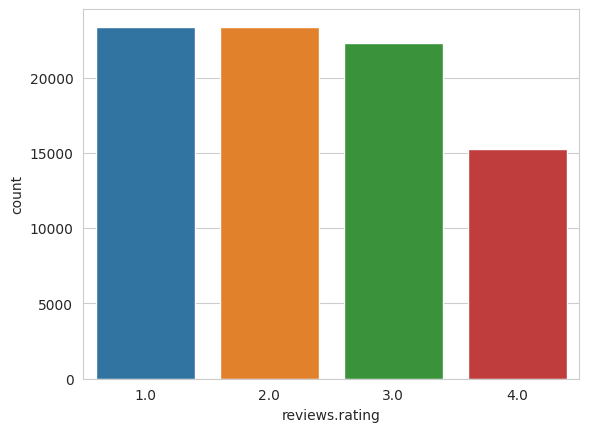

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names in the DataFrame
print(df_oversampled .columns)

# Replace 'rating' with the correct column name if needed
sns.countplot(x='reviews.rating', data=df_oversampled )

# Show the plot
plt.show()


In [ ]:
df_oversampled ['reviews.rating'].value_counts()

2.0    23372
1.0    23364
3.0    22275
4.0    15233
Name: reviews.rating, dtype: int64

In [ ]:
def data_processing(text):
    return text if pd.notnull(text) else ''

# Apply the data_processing function to the 'reviews.text' column
df_oversampled['reviews.text'] = df_oversampled['reviews.text'].apply(data_processing)

In [ ]:
df_oversampled.dropna(subset=['reviews.text'], inplace=True)

In [ ]:
tokenizer = Tokenizer(num_words=4223, split=' ')
tokenizer.fit_on_texts(df_oversampled['reviews.text'])
X = tokenizer.texts_to_sequences(df_oversampled['reviews.text'])
X = pad_sequences(X)
X

array([[   0,    0,    0, ...,   94,  769, 1065],
       [   0,    0,    0, ..., 1218,  295,    3],
       [   0,    0,    0, ...,   54,    9,   65],
       ...,
       [   0,    0,    0, ...,   27,    3,    7],
       [   0,    0,    0, ...,  370,   22,  797],
       [   0,    0,    0, ...,   93,   54,   36]], dtype=int32)

In [ ]:
X.shape

 **NEW CODE**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout


In [ ]:
# Load the dataset
csv = "/content/1429_1.csv"
df = pd.read_csv(csv)

# Keep only relevant columns
df = df[['reviews.rating', 'reviews.text']]

# Remove rows with missing values in 'reviews.rating' and 'reviews.text'
df.dropna(subset=['reviews.rating', 'reviews.text'], inplace=True)

# Convert 'reviews.rating' to integer type
df['reviews.rating'] = df['reviews.rating'].astype(int)

# Display the first few rows of the DataFrame
print(df.head())


   reviews.rating                                       reviews.text
0               5  This product so far has not disappointed. My c...
1               5  great for beginner or experienced person. Boug...
2               5  Inexpensive tablet for him to use and learn on...
3               4  I've had my Fire HD 8 two weeks now and I love...
4               5  I bought this for my grand daughter when she c...


Index(['reviews.rating', 'reviews.text'], dtype='object')


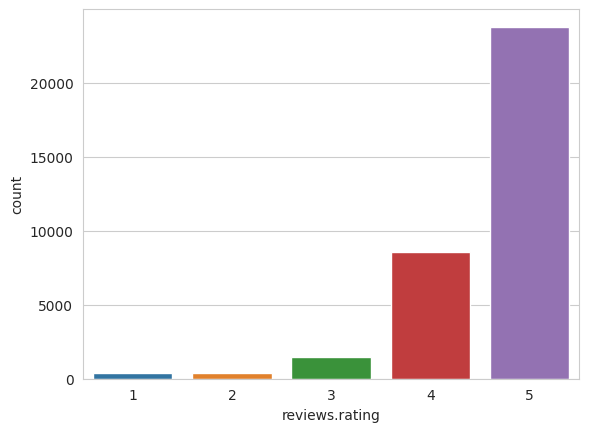

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check the column names in the DataFrame
print(df.columns)

# Replace 'rating' with the correct column name if needed
sns.countplot(x='reviews.rating', data=df )

# Show the plot
plt.show()


In [ ]:
df['reviews.rating'].value_counts()

5    23774
4     8541
3     1499
1      410
2      402
Name: reviews.rating, dtype: int64

In [ ]:
# Traditional feature representation using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['reviews.text']).toarray()
y = df['reviews.rating']

# GloVe word embeddings feature representation (if needed)
# tokenizer = Tokenizer(num_words=500)
# tokenizer.fit_on_texts(df['reviews.text'])
# X = tokenizer.texts_to_sequences(df['reviews.text'])
# X = pad_sequences(X)


In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y

0        5
1        5
2        5
3        4
4        5
        ..
34655    3
34656    1
34657    1
34658    1
34659    1
Name: reviews.rating, Length: 34626, dtype: int64

In [ ]:
X.shape

(34626, 13936)

In [ ]:
y.shape

(34626,)

GloVe word embeddings feature representation

In [ ]:
tokenizer = Tokenizer(num_words=500)
tokenizer.fit_on_texts(df['reviews.text'])
X = tokenizer.texts_to_sequences(df['reviews.text'])
X = pad_sequences(X)

In [ ]:
X

array([[  0,   0,   0, ..., 268,  13, 430],
       [  0,   0,   0, ...,  38,  65,   5],
       [  0,   0,   0, ...,  15,   5, 310],
       ...,
       [  0,   0,   0, ...,  51,  55, 366],
       [  0,   0,   0, ...,  85,  66,  28],
       [  0,   0,   0, ...,   3,  78,  34]], dtype=int32)

In [ ]:
X.shape

(34626, 1316)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Naive Bayes Classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

# Support Vector Machine (SVM) Classifier
# svm_classifier = SVC(kernel='linear')
# svm_classifier.fit(X_train, y_train)

# K-nearest Neighbor (KNN) Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# LSTM Classifier (if using GloVe embeddings)
# lstm_classifier = Sequential()
# lstm_classifier.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X.shape[1]))
# lstm_classifier.add(LSTM(128))
# lstm_classifier.add(Dense(5, activation='softmax'))
# lstm_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# lstm_classifier.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


KNeighborsClassifier()

When i have stable GPU then i will try to do the SVM classification algorithim

In [ ]:
# Support Vector Machine (SVM) Classifier
# svm_classifier = SVC(kernel='linear')
# svm_classifier.fit(X_train, y_train)

In [ ]:
# x_train, x_test, y_train, y_test = train_test_split(reviews, labels, test_size=0.2, random_state=42)

vocab_size: This represents the total number of unique words in your input data. To calculate it, you need to tokenize your text data (convert text into numerical tokens) and then count the unique tokens. The number of unique tokens will give you the vocab_size.

embedding_dim: This is the dimensionality of the word embeddings you want to use. It's a hyperparameter that you can set based on your specific problem and the size of your dataset. Common values for embedding_dim are between 50 and 300.

max_seq_length: This is the maximum length of your input sequences. To determine it, you can analyze the distribution of sequence lengths in your input data and choose a value that accommodates most of the sequences without being excessively large.

In [ ]:
max_words = 5000
max_sequence_length = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)

# Convert integer sequences back to texts
x_train_texts = tokenizer.sequences_to_texts(x_train)
x_test_texts = tokenizer.sequences_to_texts(x_test)

sequences_train = tokenizer.texts_to_sequences(x_train_texts)
sequences_test = tokenizer.texts_to_sequences(x_test_texts)

x_train_rnn = pad_sequences(sequences_train, maxlen=max_sequence_length)
x_test_rnn = pad_sequences(sequences_test, maxlen=max_sequence_length)

# Convert labels to Numpy arrays
y_train = np.array(y_train)
y_test = np.array(y_test)

# Build the LSTM model
lstm_classifier = Sequential()
lstm_classifier.add(Embedding(max_words, 100, input_length=max_sequence_length))
lstm_classifier.add(LSTM(50))
lstm_classifier.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with validation data
lstm_classifier.fit(x_train_rnn, y_train, epochs=20, batch_size=32, validation_data=(x_test_rnn, y_test))

# Evaluate the model
loss, accuracy = lstm_classifier.evaluate(x_test_rnn, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
866/866 [==============================] - 164s 185ms/step - loss: -113.2591 - accuracy: 0.0119 - val_loss: -197.6409 - val_accuracy: 0.0116
Epoch 2/20
866/866 [==============================] - 157s 182ms/step - loss: -277.6656 - accuracy: 0.0119 - val_loss: -357.9413 - val_accuracy: 0.0116
Epoch 3/20
866/866 [==============================] - 160s 185ms/step - loss: -437.0051 - accuracy: 0.0119 - val_loss: -516.8480 - val_accuracy: 0.0116
Epoch 4/20
866/866 [==============================] - 157s 181ms/step - loss: -595.5822 - accuracy: 0.0119 - val_loss: -675.3904 - val_accuracy: 0.0116
Epoch 5/20
866/866 [==============================] - 158s 182ms/step - loss: -753.9385 - accuracy: 0.0119 - val_loss: -833.7974 - val_accuracy: 0.0116
Epoch 6/20
866/866 [==============================] - 156s 180ms/step - loss: -912.2448 - accuracy: 0.0119 - val_loss: -992.2406 - val_accuracy: 0.0116
Epoch 7/20
866/866 [==============================] - 157s 181ms/step - loss: -1070.4941

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout

# Load the dataset
# Assuming you have a DataFrame named 'data' with 'text' and 'sentiment' columns
# where 'text' contains the reviews and 'sentiment' contains the labels (0 or 1)
reviews = df['reviews.text'].values
labels = df['reviews.rating'].values

max_words = 5000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)

# Pad sequences to make them of equal length
max_seq_length = 100
sequences = pad_sequences(sequences, maxlen=max_seq_length)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Build the Bidirectional LSTM model


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Create the model
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_seq_length))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


Epoch 1/10
693/693 [==============================] - 548s 770ms/step - loss: -386.4222 - accuracy: 0.0120 - val_loss: -706.9379 - val_accuracy: 0.0114
Epoch 2/10
693/693 [==============================] - 525s 757ms/step - loss: -1019.9606 - accuracy: 0.0120 - val_loss: -1329.1849 - val_accuracy: 0.0114
Epoch 3/10
693/693 [==============================] - 518s 747ms/step - loss: -1644.4897 - accuracy: 0.0120 - val_loss: -1953.0559 - val_accuracy: 0.0114
Epoch 4/10
693/693 [==============================] - 483s 697ms/step - loss: -2268.8557 - accuracy: 0.0120 - val_loss: -2577.7991 - val_accuracy: 0.0114
Epoch 5/10
693/693 [==============================] - 474s 684ms/step - loss: -2895.1763 - accuracy: 0.0120 - val_loss: -3201.4319 - val_accuracy: 0.0114
Epoch 6/10
693/693 [==============================] - 475s 686ms/step - loss: -3519.5181 - accuracy: 0.0120 - val_loss: -3824.0664 - val_accuracy: 0.0114
Epoch 7/10
693/693 [==============================] - 496s 715ms/step - loss: 

In [ ]:

# LSTM Classifier (if using GloVe embeddings)
lstm_classifier = Sequential()
lstm_classifier.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=50, input_length=X.shape[1]))
lstm_classifier.add(LSTM(128))
lstm_classifier.add(Dense(5, activation='softmax'))
lstm_classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
lstm_classifier.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)


Epoch 1/20


InvalidArgumentError: ignored